# 1. Đọc dữ liệu và kiểm tra sai sót

In [4]:
import pandas as pd

In [5]:
matches = pd.read_csv("matches_clean.csv", index_col=0)

In [6]:
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,tkld%,season,team,venue_code,opp_code,hour,target,day_code,team_code,round_code
0,2022-08-07,16:30,Matchweek 1,Sun,Away,W,2,0,West Ham,2.2,...,42.3,2023,Manchester City,0,23,16,2,6,13,0
1,2022-08-13,15:00,Matchweek 2,Sat,Home,W,4,0,Bournemouth,1.7,...,25.0,2023,Manchester City,1,2,15,2,5,13,11
2,2022-08-21,16:30,Matchweek 3,Sun,Away,D,3,3,Newcastle Utd,2.1,...,30.4,2023,Manchester City,0,15,16,0,6,13,22
3,2022-08-27,15:00,Matchweek 4,Sat,Home,W,4,2,Crystal Palace,2.2,...,21.1,2023,Manchester City,1,7,15,2,5,13,32
4,2022-08-31,19:30,Matchweek 5,Wed,Home,W,6,0,Nott'ham Forest,3.3,...,47.6,2023,Manchester City,1,17,19,2,2,13,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,2020-07-07,18:00,Matchweek 34,Tue,Away,L,1,2,Watford,1.2,...,40.7,2020,Norwich City,0,21,18,1,1,16,27
34,2020-07-11,12:30,Matchweek 35,Sat,Home,L,0,4,West Ham,0.6,...,66.7,2020,Norwich City,1,23,12,1,5,16,28
35,2020-07-14,20:15,Matchweek 36,Tue,Away,L,0,1,Chelsea,0.1,...,14.3,2020,Norwich City,0,6,20,1,1,16,29
36,2020-07-18,17:30,Matchweek 37,Sat,Home,L,0,2,Burnley,0.3,...,46.2,2020,Norwich City,1,5,17,1,5,16,30


## 1.1 Kiểm tra số lượng bản ghi
Mỗi bản ghi là một trận đấu. Ở mỗi mùa sẽ có 20 đội được thi đấu ở Premier League, mỗi đội phải thi đấu tổng cộng 38 trận, bộ dữ liệu bao gồm 4 mùa từ mùa 2019-2020 đến 2022-2023. Vậy số lượng bản ghi sẽ phải là: 4 x 38 x 20 = 3040

In [49]:
len(matches)

3040

In [50]:
matches["team"].value_counts()

Manchester City             152
Crystal Palace              152
Southampton                 152
Leicester City              152
Everton                     152
West Ham United             152
Arsenal                     152
Chelsea                     152
Wolverhampton Wanderers     152
Tottenham Hotspur           152
Aston Villa                 152
Brighton and Hove Albion    152
Liverpool                   152
Newcastle United            152
Manchester United           152
Leeds United                114
Burnley                     114
Fulham                       76
Brentford                    76
Bournemouth                  76
Watford                      76
Norwich City                 76
Sheffield United             76
Nottingham Forest            38
West Bromwich Albion         38
Name: team, dtype: int64

In [51]:
matches["round"].value_counts()

Matchweek 1     80
Matchweek 30    80
Matchweek 23    80
Matchweek 12    80
Matchweek 24    80
Matchweek 25    80
Matchweek 26    80
Matchweek 27    80
Matchweek 29    80
Matchweek 31    80
Matchweek 2     80
Matchweek 33    80
Matchweek 34    80
Matchweek 28    80
Matchweek 35    80
Matchweek 36    80
Matchweek 37    80
Matchweek 32    80
Matchweek 22    80
Matchweek 21    80
Matchweek 7     80
Matchweek 20    80
Matchweek 3     80
Matchweek 4     80
Matchweek 5     80
Matchweek 6     80
Matchweek 8     80
Matchweek 9     80
Matchweek 10    80
Matchweek 11    80
Matchweek 13    80
Matchweek 14    80
Matchweek 15    80
Matchweek 16    80
Matchweek 17    80
Matchweek 18    80
Matchweek 19    80
Matchweek 38    80
Name: round, dtype: int64

Kết luận: Số lượng bản ghi khớp với những gì ta đã tính toán

## 1.2 Kiểm tra số lượng bản ghi có giá trị rỗng

In [6]:
nan_count = matches.isna().sum()

In [7]:
nan_count

date            0
time            0
round           0
day             0
venue           0
result          0
gf              0
ga              0
opponent        0
xg              0
xga             0
poss            0
attendance      0
captain         0
formation       0
referee         0
match report    0
sh              0
sot             0
sot%            0
g/sh            0
g/sot           0
cmp             0
cmp%            0
sca             0
gca             0
touches         0
succ%           0
tkld%           0
season          0
team            0
venue_code      0
opp_code        0
hour            0
target          0
day_code        0
team_code       0
round_code      0
dtype: int64

Kết luận: Bộ dữ liệu không có cột nào giá trị null

## 1.3 Giải thích trường dữ liệu

In [54]:
matches.columns

Index(['date', 'time', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'sh', 'sot', 'sot%', 'g/sh', 'g/sot', 'cmp',
       'cmp%', 'sca', 'gca', 'touches', 'succ%', 'tkld%', 'season', 'team',
       'venue_code', 'opp_code', 'hour', 'target', 'day_code', 'team_code',
       'round_code'],
      dtype='object')

+ date: Ngày thi đấu
+ time: Giờ thi đấu
+ round: Vòng đấu
+ day: Ngày thứ mấy trong tuần
+ venue: Đá trên sân nhà hay sân khách (away / home)
+ result: Kết quả trận đấu (thắng (W), thua (L), hòa (D)
+ gf: Số bàn ghi được
+ ga: Số bàn bị ghi bởi đối thủ
+ opponent: Tên đội đối thủ
+ xg: Số bàn thắng kì vọng ghi được (được tính toán dựa trên số cú sút trúng đích, penalty, ...)
+ xga: Số bàn thua kì vọng (được tính toán dựa trên số cú sút trúng đích của đối phương, penalty đối phương được hưởng, ..)
+ poss: Tỉ lệ kiểm soát bóng (%)
+ attendance: Số lượng khán giả ở sân
+ captain: Tên đội trưởng của đội đang xét (ở trường team)
+ formation: Chiến thuật (đội hình)
+ refree: Tên trọng tài
+ match report: Bản báo cáo của trận đấu
+ sh: Số cú sút
+ sot: Số cú sút trúng đích
+ g/sh: Số bàn thắng trên số cú sút
+ g/sot: Số bàn thắng trên số cú sút trúng đích
+ cmp: Tổng số đường chuyền
+ cmp %: Tỉ lệ chuyền thành công
+ sca: Điểm tạo ra cú sút (một cú sút sau 2 hành động bất kì sẽ được tính điểm sca, một cầu thủ có thể nhận nhiều điểm dựa trên nhiều hành động cùng lúc)
+ gca: Điểm tạo ra bàn thắng (một bàn thắng sau 2 hành động bất kì sẽ được tính điểm sca, một cầu thủ có thể nhận nhiều điểm dựa trên nhiều hành động cùng lúc)
+ touches: Số lần chạm bóng
+ succ%: Tỉ lệ qua người thành công
+ tkld%: Tỉ lệ tắc bóng thành công (lấy bóng trong chân đối thủ)
+ season: Mùa thi đấu (ví dụ: Mùa 2019,..)
+ team: Tên đội bóng đang xét
+ venue_code: Đá trên sân nhà hay sân khách nhưng theo mã (1: sân nhà, 0: sân khách)
+ opp_code: Mã của đội đối thủ
+ hour: Giờ thi đấu
+ target: Kết quả trận đấu dưới dạng mã (2: thắng, 1: thua, 0: hòa)
+ team_code: Mã đội đang xét

# 2. Quan sát, phân tích các biểu đồ tương quan giữa các đặc trưng và kết quả trận đấu

In [8]:
man_city_matches = matches[matches["team"] == "Manchester City"]

In [8]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import seaborn as sns

Trên thực tế, qua nhiều nghiên cứu của các chuyên gia bóng đá, ta có thể rút ra được các đặc trưng có ảnh hưởng cao đến kết quả trận đấu (bao gồm cả các đặc trưng chỉ có trong các trận đấu ở quá khứ): Số bàn thắng được kỳ vọng sẽ ghi (xg), số bàn thua dự kiến (xga), số lượng hành động dẫn đến một bàn thắng (gca), số lượng hành động trước khi dẫn đến một cú sút (sca), tỉ lệ kiểm soát bóng (poss), kết quả trận đấu trong quá khứ (target). Ngoài các đặc trưng này, chúng ta sẽ khảo sát thêm các đặc trưng mà có thể lấy được giá trị ở thời điểm hiện tại để tăng tính chính xác như số lượng khán giả, giờ đấu, vòng đấu.

## 2.1 Xg

<IPython.core.display.Javascript object>


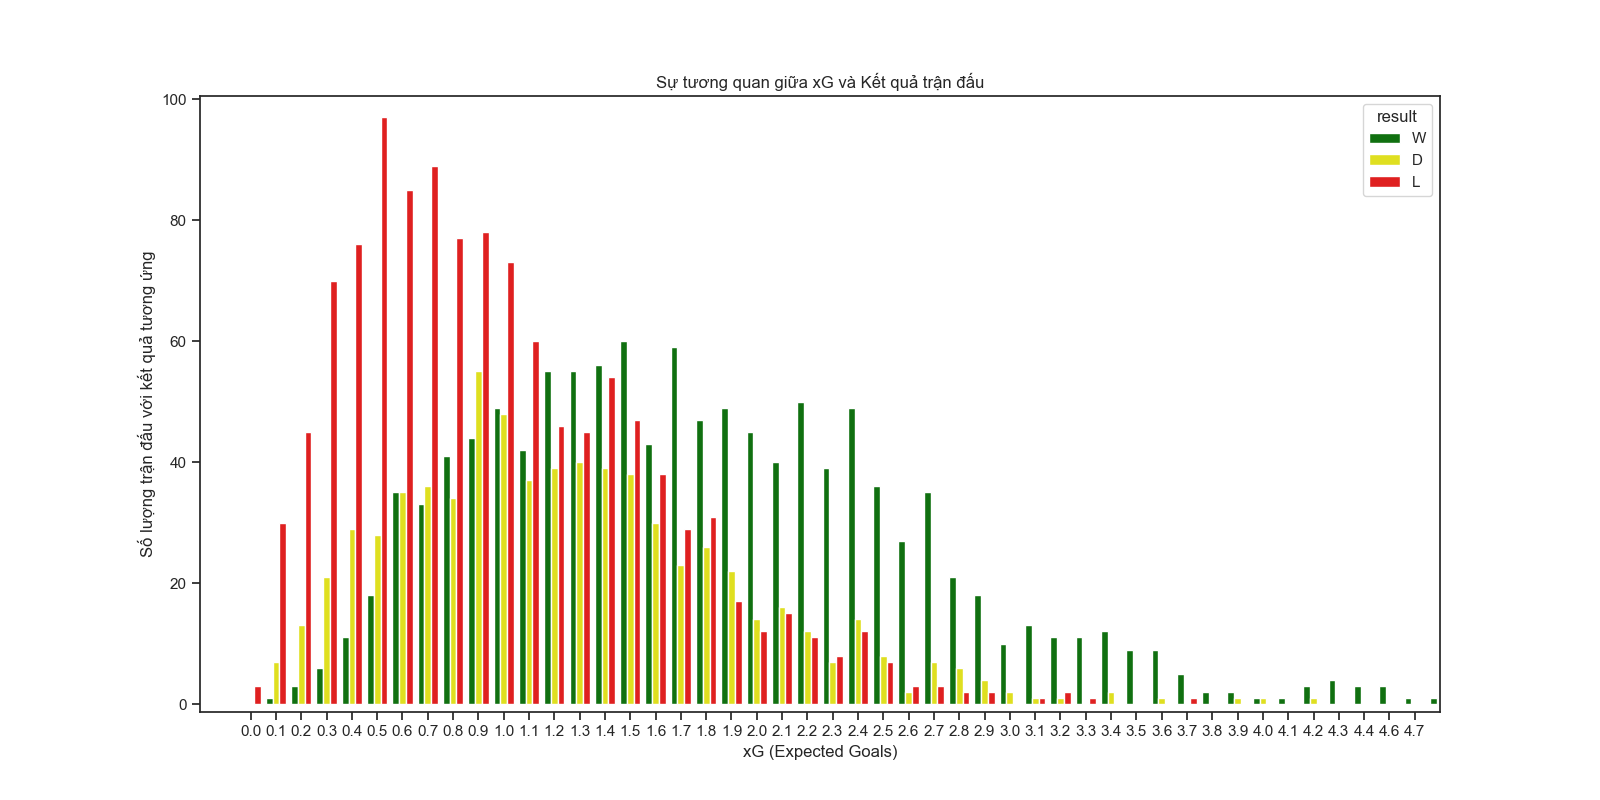

In [57]:
plt.figure(figsize=(16, 8))
sns.countplot(x='xg', hue='result', data=matches, palette={'W': 'green', 'D': 'yellow', 'L': 'red'})

plt.title('Sự tương quan giữa xG và Kết quả trận đấu')
plt.xlabel('xG (Expected Goals)')
plt.ylabel('Số lượng trận đấu với kết quả tương ứng')

plt.show()

Với xg (số bàn thắng kì vọng) càng thấp (dưới 1.1) thì tỉ lệ thua cao hơn, với xg càng cao (hơn 1.1) ta có tỉ lệ thắng cao hơn. Chỉ số này cho số liệu hợp lý với ý nghĩa của nó vì theo lẽ thường đội ghi được càng nhiều bàn thắng sẽ có tỉ lệ thắng cao hơn. Sự phân loại rất rõ ở các miền dữ liệu khác nhau.

## 2.2 xga

<IPython.core.display.Javascript object>


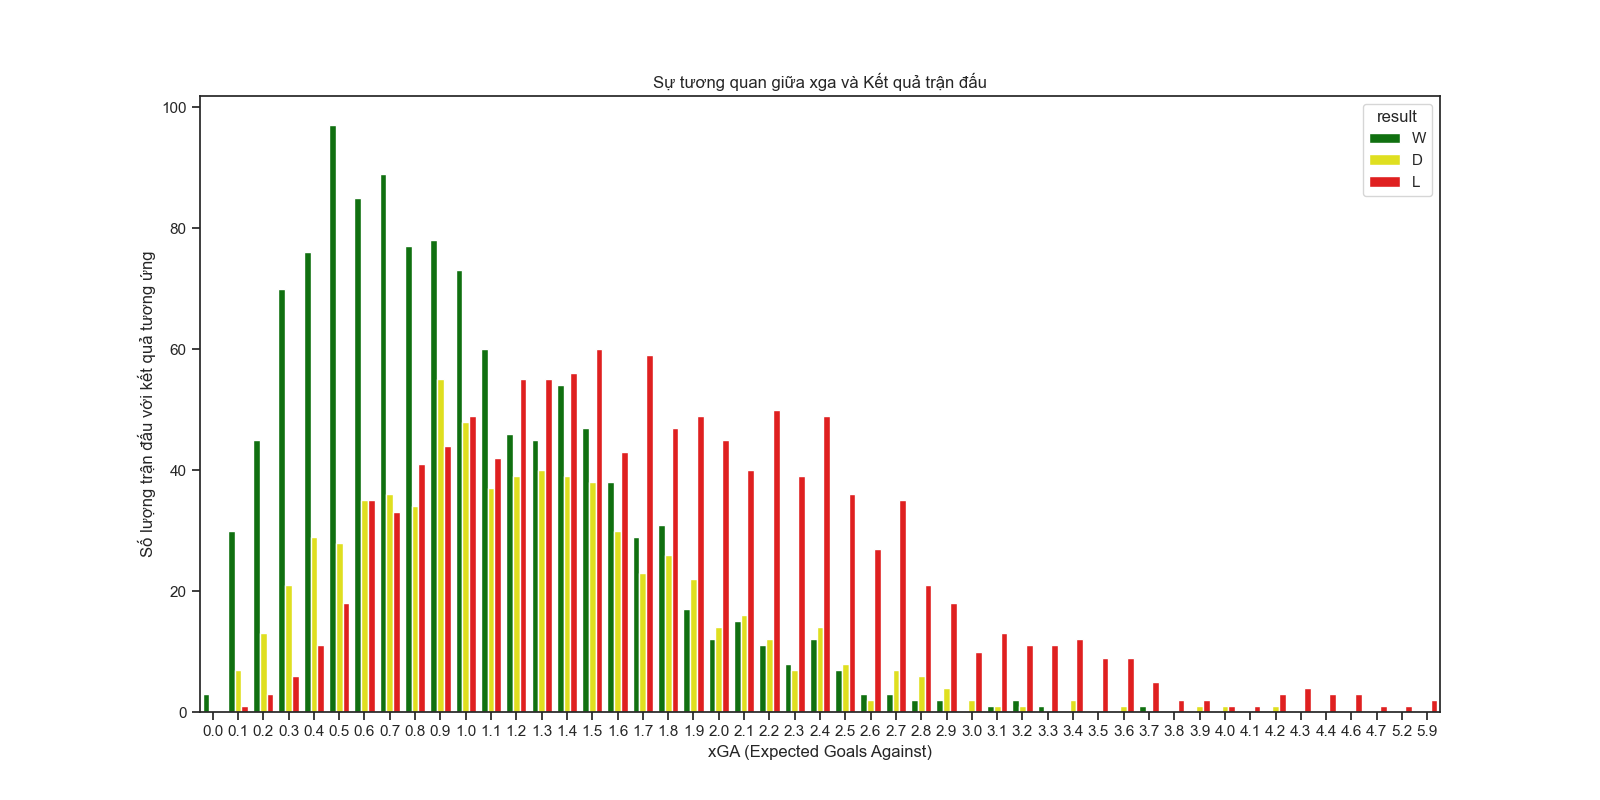

In [278]:
plt.figure(figsize=(16, 8))
sns.countplot(x='xga', hue='result', data=matches, palette={'W': 'green', 'D': 'yellow', 'L': 'red'})

plt.title('Sự tương quan giữa xga và Kết quả trận đấu')
plt.xlabel('xGA (Expected Goals Against)')
plt.ylabel('Số lượng trận đấu với kết quả tương ứng')

plt.show()

Với xga càng thấp ta thấy tỉ lệ thắng càng cao trái ngược với xg. Hay nói cách khác, số bàn thua có thể phải nhận càng cao thì tỉ lệ đội bóng thua càng cao. Biểu đồ cho ta thấy sự phân loại rõ ràng giữa 2 miền giá trị (mức thấp: 0 tới 1.1, mức cao: 1.1 trở lên), ở mức thấp thì tỉ lệ thắng cao hơn rất nhiều.

## 2.3 gca

In [66]:
plt.figure(figsize=(16, 8))
sns.countplot(x='gca', hue='result', data=matches, palette={'W': 'green', 'D': 'yellow', 'L': 'red'})

plt.title('Sự tương quan giữa gca và Kết quả trận đấu')
plt.xlabel('gca (goal creating actions)')
plt.ylabel('Số lượng trận đấu với kết quả tương ứng')

plt.show()

<IPython.core.display.Javascript object>

Quan sát biểu đồ ta nhận thấy trong miền giá trị từ 0 tới 1 tỷ lệ thua cao, giá trị cao hơn 1 thì tỷ lệ thắng cao hơn. Nếu so sánh điều này với những gì đã phân tích với xg ta thấy có sự tương đồng, nếu xg trong miền giá trị từ 0 tới 1.1 thì tỷ lệ thua cao hay nói cách khác số bàn thắng ghi được trong khoảng 1 bàn trở lại tỷ lệ thua cao hơn, còn gca miền giá trị từ 0 tới 1 có nghĩa là số bàn thắng ghi được chỉ từ 1 bàn trở lại và miền giá trị này cũng cho tỷ lệ thua cao hơn. Trường gca cho thấy sự phân loại khá rõ nét và có sự tương quan mạnh mẽ với xg, xga.

## 2.4 sca

In [67]:
plt.figure(figsize=(30, 15))
sns.countplot(x='sca', hue='result', data=matches, palette={'W': 'green', 'D': 'yellow', 'L': 'red'})

plt.title('Sự tương quan giữa sca và Kết quả trận đấu')
plt.xlabel('sca (Shot creating actions)')
plt.ylabel('Số lượng trận đấu với kết quả tương ứng')

plt.show()

<IPython.core.display.Javascript object>

Quan sát biểu đồ tương quan của sca với kết quả trận đấu ta nhận thấy sca càng cao thì tỉ lệ thắng càng cao, với miền giá trị từ 19 trở lên luôn cho tỷ lệ thắng cao hơn. Sự phân loại này rất rõ ràng, việc có nhiều điểm trong việc tạo ra cơ hội sút bóng cho thấy sự áp đảo của đội bóng đó.

## 2.5 possession

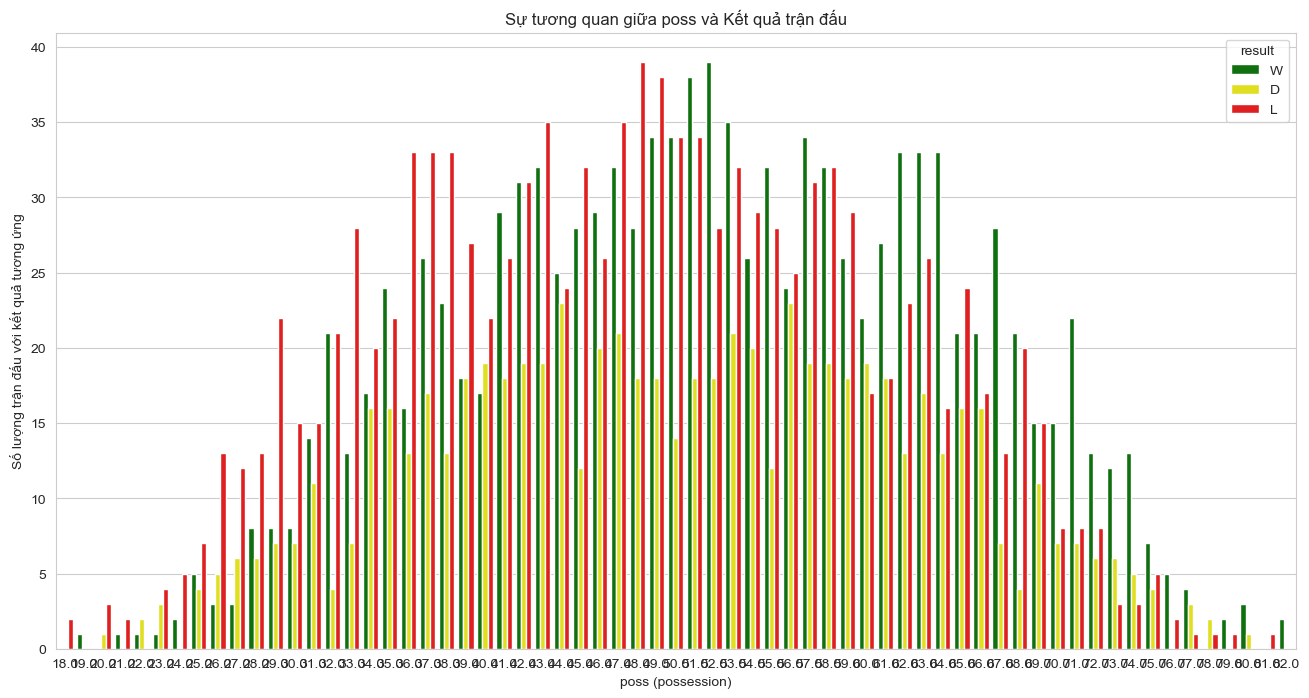

In [35]:
plt.figure(figsize=(30, 15))
sns.countplot(x='poss', hue='result', data=matches, palette={'W': 'green', 'D': 'yellow', 'L': 'red'})

plt.title('Sự tương quan giữa poss và Kết quả trận đấu')
plt.xlabel('poss (possession)')
plt.ylabel('Số lượng trận đấu với kết quả tương ứng')

plt.show()

Tỉ lệ kiểm soát bóng từ 51% trở lên (cao hơn đối thủ) thì tỷ lệ thắng cao hơn dù trong miền giá trị từ 51% tới 82% vẫn có những trường hợp ngoại lệ nhưng số lượng rất ít (nguyên nhân có lẽ do việc đối thủ phòng ngự quá chắc chắn và không tận dụng tốt cơ hội). Nhìn chung biểu đồ cho thấy sự phân hóa giữa 2 miền giá trị (thấp hơn đối thủ (từ 50% trở xuống) và cao hơn hơn đối thủ (51% trở lên)) và kiểm soát bóng càng nhiều tỷ lệ chiến thắng càng cao.

## 2.6 Attendance

Vì giá trị của attendance lớn và phân bố rộng nên sử dụng histplot dạng stack để dễ quan sát thay vì sử dụng countplot như những đặc trưng trên. Nếu sử dụng countplot ta sẽ không thể quan sát biểu đồ được

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


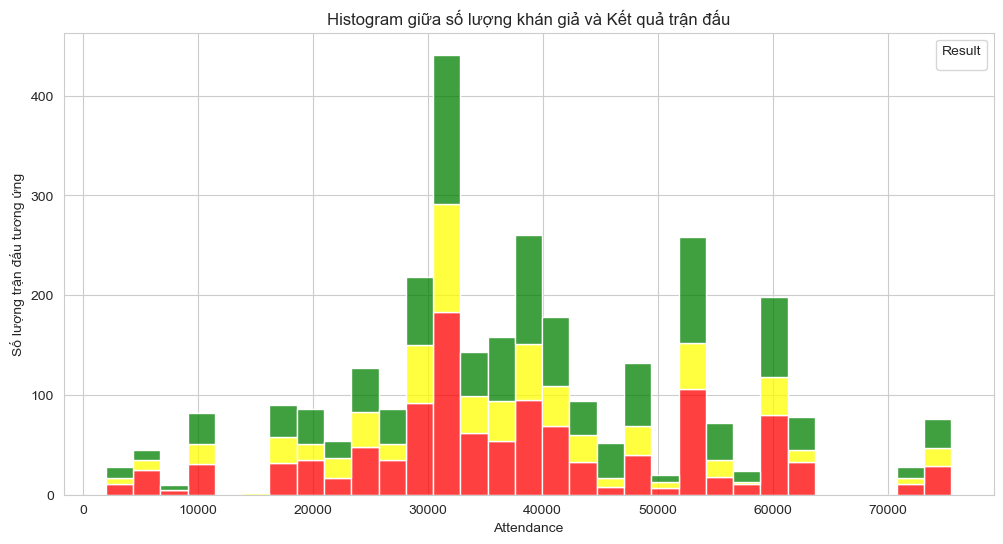

In [33]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=matches, x='attendance', hue='result', multiple='stack', palette={'W': 'green', 'D': 'yellow', 'L': 'red'})

plt.title('Histogram giữa số lượng khán giả và Kết quả trận đấu')
plt.xlabel('Attendance')
plt.ylabel('Số lượng trận đấu tương ứng')

plt.legend(title='Result')

plt.show()

Dù ở miền giá trị nào ta vẫn thấy tỷ lệ chiến thắng cao hơn. Lý do cho điều này là trường dữ liệu chỉ cho biết lượng khán giả đến sân mà không biết họ cổ vũ đội nào nên biểu đồ mới phân loại không rõ ràng. Vì phân loại không rõ ràng nên ta sẽ không sử dụng trường này để dự đoán.

## 2.7 Hour

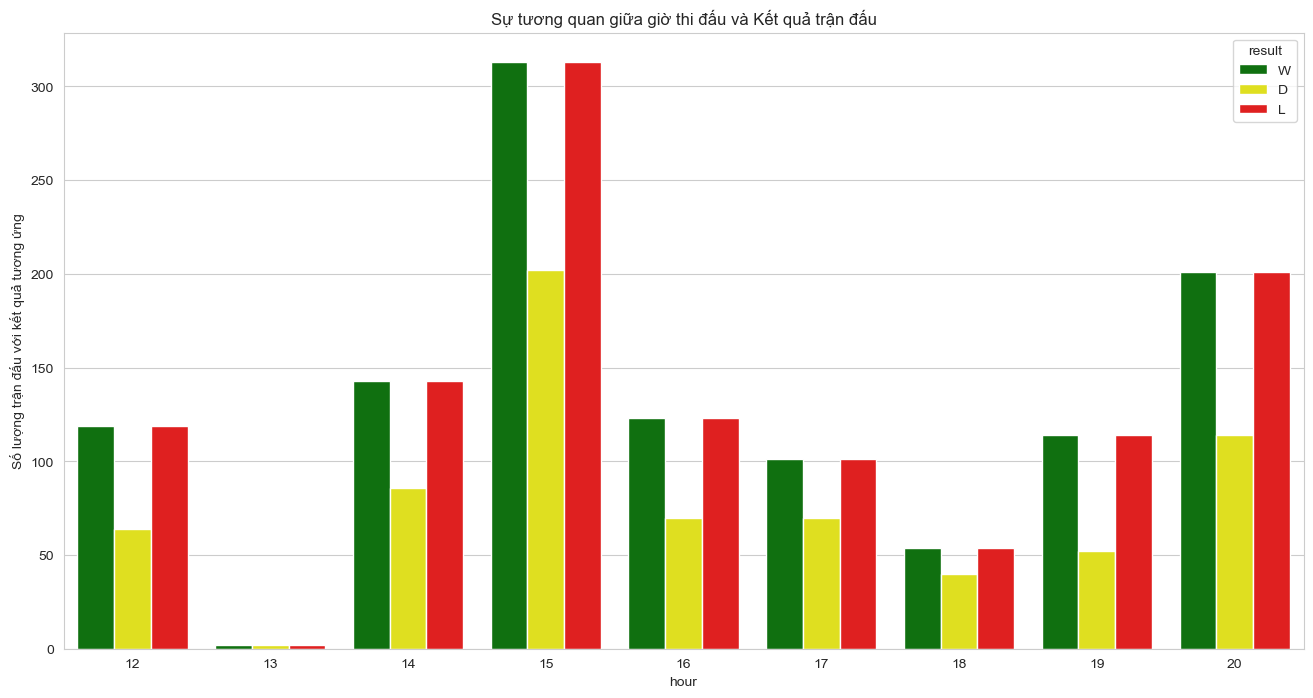

In [59]:
plt.figure(figsize=(16, 8))
sns.countplot(x='hour', hue='result', data=matches, palette={'W': 'green', 'D': 'yellow', 'L': 'red'})

plt.title('Sự tương quan giữa giờ thi đấu và Kết quả trận đấu')
plt.xlabel('hour')
plt.ylabel('Số lượng trận đấu với kết quả tương ứng')

plt.show()

Sự phân loại không rõ ràng giữa các miền giá trị, dù ở miền nào thì có vẻ giờ thi đấu không thật sự ảnh hưởng quá nhiều đến kết quả trận đấu. Bằng chứng là biểu đồ cho tỷ lệ thắng thua ngang nhau

## 2.8 Round

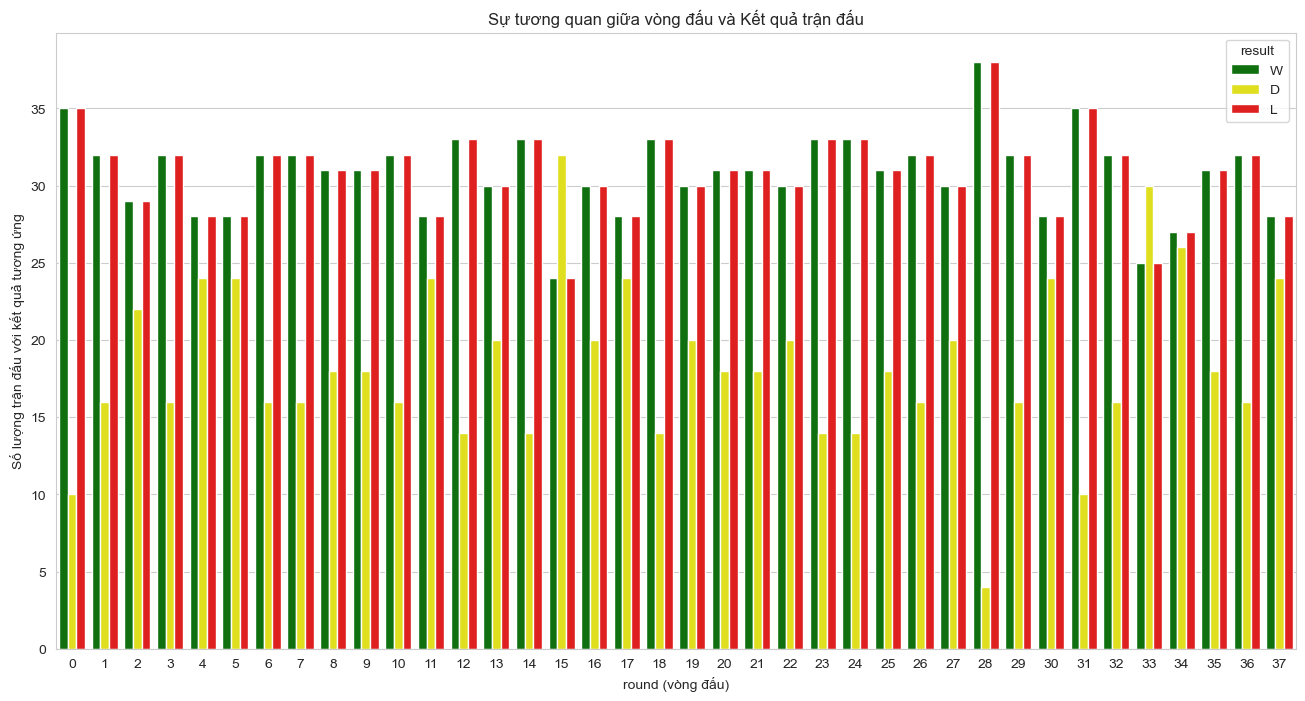

In [60]:
plt.figure(figsize=(16, 8))
sns.countplot(x='round_code', hue='result', data=matches, palette={'W': 'green', 'D': 'yellow', 'L': 'red'})

plt.title('Sự tương quan giữa vòng đấu và Kết quả trận đấu')
plt.xlabel('round (vòng đấu)')
plt.ylabel('Số lượng trận đấu với kết quả tương ứng')

plt.show()

Tương tự trường hour, trường round cũng rất đồng đều về tỷ lệ thắng thua, dựa vào round ta không thể đưa ra được dự đoán.

## 2.10 Tỉ lệ chiến thắng khi là đội nhà

<IPython.core.display.Javascript object>


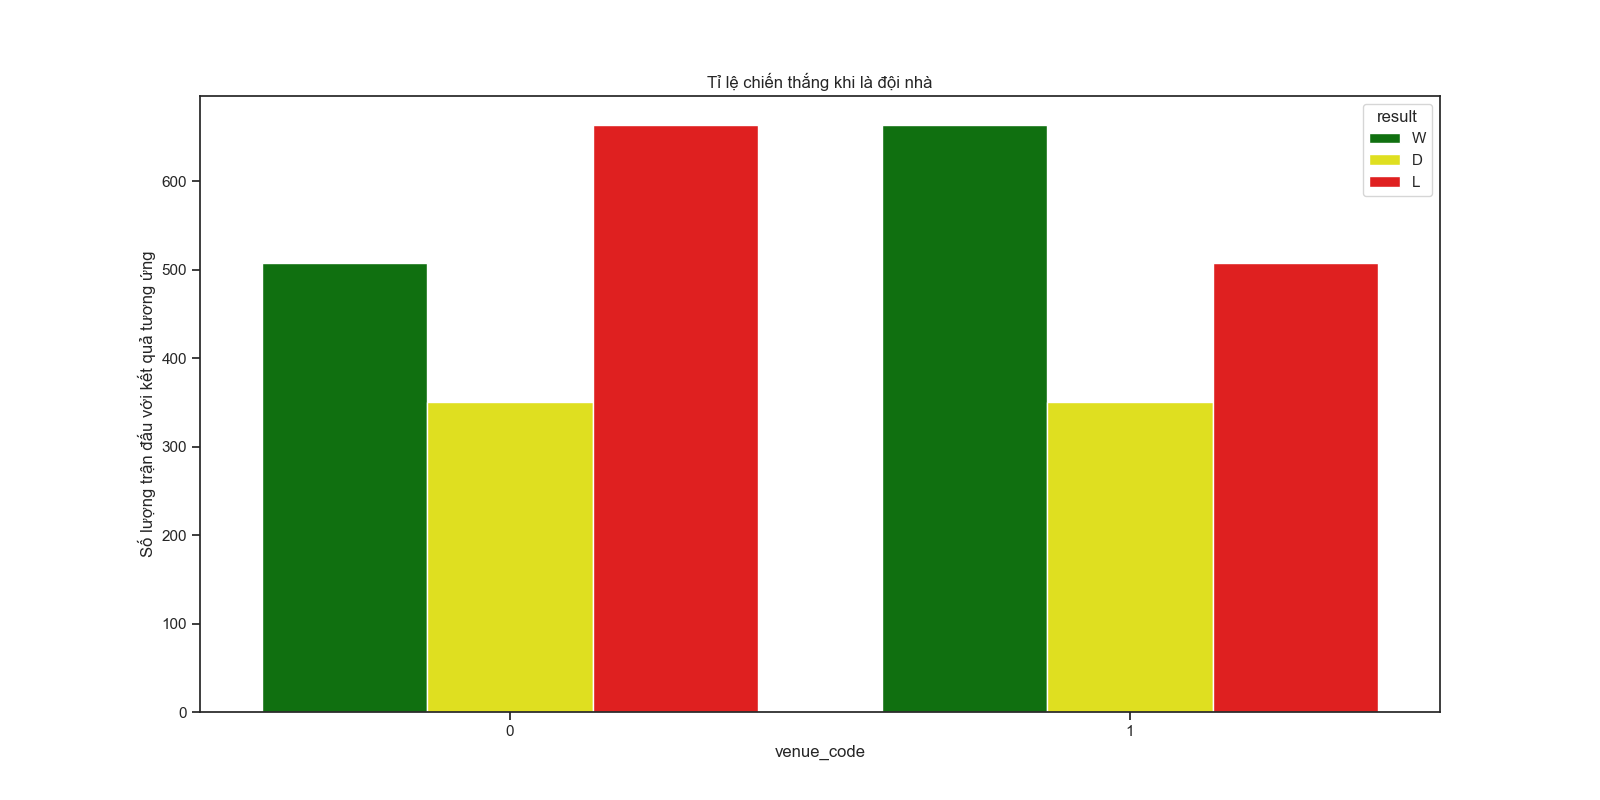

In [279]:
plt.figure(figsize=(16, 8))
sns.countplot(x='venue_code', hue='result', data=matches, palette={'W': 'green', 'D': 'yellow', 'L': 'red'})

plt.title('Tỉ lệ chiến thắng khi là đội nhà')
plt.xlabel('venue_code')
plt.ylabel('Số lượng trận đấu với kết quả tương ứng')

plt.show()

Khi là đội nhà thì tỷ lệ thắng cao hơn so với khi làm đội khách, điều này là dễ hiểu vì khi là đội nhà, họ sẽ được hưởng nhiều yếu tố: khán giả cỗ vũ đông hơn, quen với mặt sân, quen với thời tiết,..

## 2.11 g/sh

<IPython.core.display.Javascript object>


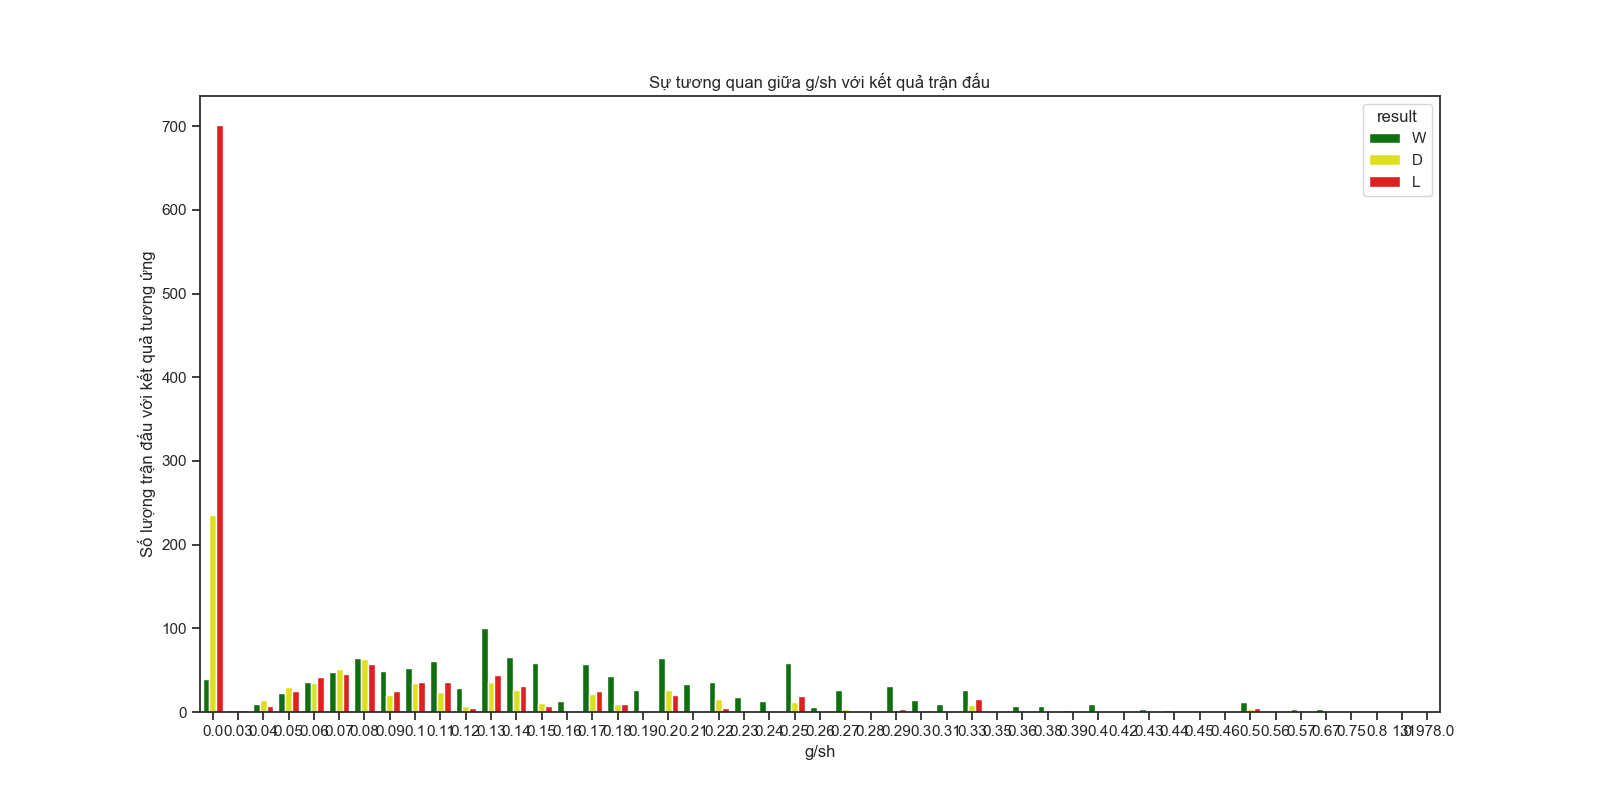

In [280]:
plt.figure(figsize=(30, 15))
sns.countplot(x='g/sh', hue='result', data=matches, palette={'W': 'green', 'D': 'yellow', 'L': 'red'})

plt.title('Sự tương quan giữa g/sh với kết quả trận đấu')
plt.xlabel('g/sh')
plt.ylabel('Số lượng trận đấu với kết quả tương ứng')

plt.show()

g/sh(tỷ lệ cú sút thành bàn) càng thấp tỷ lệ thắng càng giảm, với g/sh bằng 0 thì tỷ lệ thua gấp tỷ lệ thắng tới hơn 7 lần. Tỷ lệ cú sút thành bàn càng cao đồng nghĩa với với việc số bàn thắng ghi được càng nhiều, mà số liệu từ xg và gca đã chỉ ra cho ta biết số bàn thắng càng nhiều và các tỉ lệ liên quan đến thông số này càng cao thì tỉ lệ chiến thắng càng cao và ngược lại

## 2.12 CMP% Tỷ lệ đường chuyền thành công

In [ ]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
matches['cmp%_bin'] = pd.cut(matches['cmp%'], bins=bins)

plt.figure(figsize=(14, 8))
sns.countplot(x='cmp%_bin', hue='result', data=matches, palette={'W': 'green', 'D': 'yellow', 'L': 'red'})

plt.title('Sự tương quan giữa cmp% và Kết quả trận đấu')
plt.xlabel('cmp% (tỉ lệ đường chuyền thành công), Đơn vị: %')
plt.ylabel('Số lượng trận đấu với kết quả tương ứng')

plt.show()

In [ ]:
bins = [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]
matches['cmp%_bin'] = pd.cut(matches['cmp%'], bins=bins)

plt.figure(figsize=(14, 8))
sns.countplot(x='cmp%_bin', hue='result', data=matches, palette={'W': 'green', 'D': 'yellow', 'L': 'red'})

plt.title('Sự tương quan giữa cmp% và Kết quả trận đấu')
plt.xlabel('cmp% (tỉ lệ đường chuyền thành công), Đơn vị: %')
plt.ylabel('Số lượng trận đấu với kết quả tương ứng')

plt.show()

#### Nhận xét:
- tỷ lệ đường chuyền hoàn thành cao -> khả năng kiểm soát trận đấu tốt hơn, tạo cơ hội ghi bàn, kiểm soát bóng tốt hơn cũng như triển khai tấn công nên khi tỉ lệ đường chuyền thành công cao sẽ giúp chiến thắng hơn.
- Lý do có thể có để dẫn đến việc tỷ lệ đường chuyền thấp hơn nhưng vẫn có tỷ lệ thắng cao hơn là: do may mắn hoặc họ đang triển khai đội hình phòng thủ, nên việc chuyền ít đi là do bị cản phá và phản công là chính. Và đương nhiên là phản công thành công, khả năng ghi bàn cũng liên quan không nhỏ.

- Ta có thể thấy kết quả thay đổi rõ rệt sau cột mốc 82%

## 2.13. Tkld% Tỷ lệ tắc bóng (cướp bóng) thành công - Tackle Success

In [ ]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
matches['tkld%_bin'] = pd.cut(matches['tkld%'], bins=bins)

plt.figure(figsize=(16, 8))
sns.countplot(x='tkld%_bin', hue='result', data=matches, palette={'W': 'green', 'D': 'yellow', 'L': 'red'})

plt.title('Sự tương quan giữa tkld% và Kết quả trận đấu')
plt.xlabel('Tkld% Tỷ lệ cướp bóng thành công - Tackle Success, Đơn vị: %')
plt.ylabel('Số lượng trận đấu với kết quả tương ứng')

plt.show()

#### Nhận xét
- Ta thấy tỉ lệ cướp bóng thành công mặc dù có ảnh hưởng tới kết quả trận đấu, nhưng nó không phân hóa rõ rệt.
- Đặc biệt ở tỉ lệ thành công là (90;100] %, số trận thua lại cao hơn
- Biểu đồ này nếu xét trên phương diện tỉ lệ chiến thắng (số trận thắng/ số trận thua) thì ta có thể thấy sự lên xuống rất thất thường.

     **Điều này kể đến là do:

     - Đội để bị dẫn bóng quá nhiều (trung vệ và tiền đạo dễ bị cướp bóng) gây nên tình thế bị động, và đội hình phòng thủ nên tỉ lệ phản công cao, nhưng không tăng tỉ lệ chiến thắng.
     - **Tỉ lệ đường chuyền thành công thấp cũng dẫn tới việc sau khi phản công không tạo được thế tấn công nên không tạo được cơ hội ghi bàn**.

## 2.14. Tương quan giữa cmp% / tkld% với sh

In [ ]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
matches['cmp%_bin'] = pd.cut(matches['cmp%'], bins=bins)

plt.figure(figsize=(18, 12))
sns.countplot(x='cmp%_bin', hue='sh', data=matches)

plt.title('Sự tương quan giữa cmp% và sh')
plt.xlabel('cmp% (tỉ lệ đường chuyền thành công), Đơn vị: %')
plt.ylabel('số trận đấu tương ứng với khoảng tỉ lệ đường chuyền')

plt.show()

In [ ]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
matches['tkld%_bin'] = pd.cut(matches['tkld%'], bins=bins)

plt.figure(figsize=(18, 12))
sns.countplot(x='tkld%_bin', hue='sh', data=matches)

plt.title('Sự tương quan giữa tkld% và sh')
plt.xlabel('Tkld% Tỷ lệ cướp bóng thành công - Tackle Success, Đơn vị: %')
plt.ylabel('Tổng số cú sút của đội bóng trong một trận đấu')

plt.show()

#### Nhận xét:
- Tỉ lệ đường chuyền thành công cao dẫn mang đến được nhiều cú sút (sh) hơn giúp tăng khả năng ghi bàn.
- Việc những cú sút tăng rồi giảm là do số trận đấu đạt tới tỉ lệ đường chuyền cao như trên là rất thấp
- Quan sát dải màu ta thấy khi tỉ lệ đường chuyền thành công tăng, số cú sút (theo dải màu) tăng theo
- cmp% **ảnh hưởng trực tiếp tới sh**, việc cmp% không **ảnh hưởng trực tiếp tới kết quả trận đấu** là do sot (shot on target - cú sút trúng đích(thủ môn bắt buộc phải đỡ/ hậu vệ cản phá)) và sot%
- Không phân hóa rõ rệt, nhưng sự ảnh hưởng của tkld% lên sh là có
- Tổng số cú sút (sh) có tăng lên khi tỉ lệ tkld% tăng nhưng không quá rõ rệt
- tkld% ảnh hưởng trực tiếp đến sh, từ đó có thể gây ảnh hưởng gián tiếp đến kết quả trận đấu - sẽ được rút ra ở các phần sau.

## 2.15 sh với kết quả trận đấu:

In [ ]:
plt.figure(figsize=(16, 12))
sns.countplot(x='sh', hue='result', data=matches, palette={'W': 'green', 'D': 'yellow', 'L': 'red'})

plt.title('Sự tương quan giữa sh và kết quả trận đấu')
plt.xlabel(' sh - tổng số cú sút của đội bóng trong một trận đấu')
plt.ylabel('Kết quả trận đấu tương ứng')

plt.show()

#### Nhận xét:
- Biểu đồ phân hóa rõ rệt
- Khi tổng số cú sút tăng, tỉ lệ chiến thắng trận đấu cũng tăng theo

## 2.16. Tương quan giứa sot% và kết quả trận đấu

In [ ]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
matches['sot%_bin'] = pd.cut(matches['sot%'], bins=bins)
plt.figure(figsize=(18, 12))
sns.countplot(x='sot%_bin', hue='result', data=matches, palette={'W': 'green', 'D': 'yellow', 'L': 'red'})

plt.title('Sự tương quan giữa sot% với kết quả trận đấu')
plt.xlabel('sot% tỉ lệ cú sút trúng đích thành công, Đơn vị: %')
plt.ylabel('số kết quả trận đấu')

plt.show()

#### Nhận xét:
Ta thấy được sự phân hóa rõ rệt. Khi SOT% tăng tỉ lệ chiến thắng cao hơn do:
- Khi triển khai tấn công, chỉ số này đánh giá hiệu quả của việc tấn công như: kiến tạo, chuyền tốt hay xấu, góc sút, kỹ năng cá nhân, chiến lược tấn công, khoảng cách sút, số lượng hậu vệ,...
- Phụ thuộc vào kỹ năng tiền đạo
- Chỉ số sot% cực kì cao cũng có thể là do việc không thể triển khai tấn công, và trong số ít lần tấn công thành công đó, tạo được sot, gây nên tỉ lệ sot% cao nhưng kết quả trận đấu lại không như mong đợi

## 2.12 Biểu đồ tương quan giữa nhiều đặc trưng với kết quả trận đấu

In [ ]:
matches_reset = matches.reset_index()
sns.pairplot(matches_reset, vars=["xg", "xga", "poss","sca", "gca", "g/sh", "sot%", "cmp%", 'sot%', 'cmp%', 'tkld%','sh'], hue='result', palette={'W': 'green', 'D': 'yellow', 'L': 'red'})
plt.suptitle('Tương quan giữa sot%, cmp%, tkld%, sh và Kết quả trận đấu', y=1.05)
plt.show()

Dựa vào phân bố biểu đồ ta thấy các đặc trưng nên chọn là "xg", "xga", "poss","sca", "gca" vì chúng có sự tương quan phân loại tốt. Tuy nhiên trong bài toán dự đoán chúng ta nên thử nghiệm với nhiều trường hợp đặc trưng khác nhau để tìm ra bộ dự đoán có sai số thấp nhất

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [73]:
train = matches[matches["date"] < '2022-01-01']
test = matches[matches["date"] > '2022-01-01']
predictors = ["team_code","venue_code", "opp_code", "xg", "xga","poss", "sca" ,"gca", "cmp%", "g/sh"]
rf.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

Sau khi thử nghiệm nhiều bộ đặc trưng khác nhau thì bộ đặc trưng: "team_code","venue_code", "opp_code", "xg", "xga","poss", sca","gca", "cmp%", "g/sh" cho sai số thấp nhất, trong đó team_code, opp_code là bắt buộc có.

In [74]:
preds = rf.predict(test[predictors])

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy = accuracy_score(test["target"], preds)

In [77]:
accuracy

0.6977351916376306

In [27]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=preds))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1,2
actual,,,
0,60,113,79
1,45,371,32
2,29,52,367


In [75]:
import matplotlib.pyplot as plt

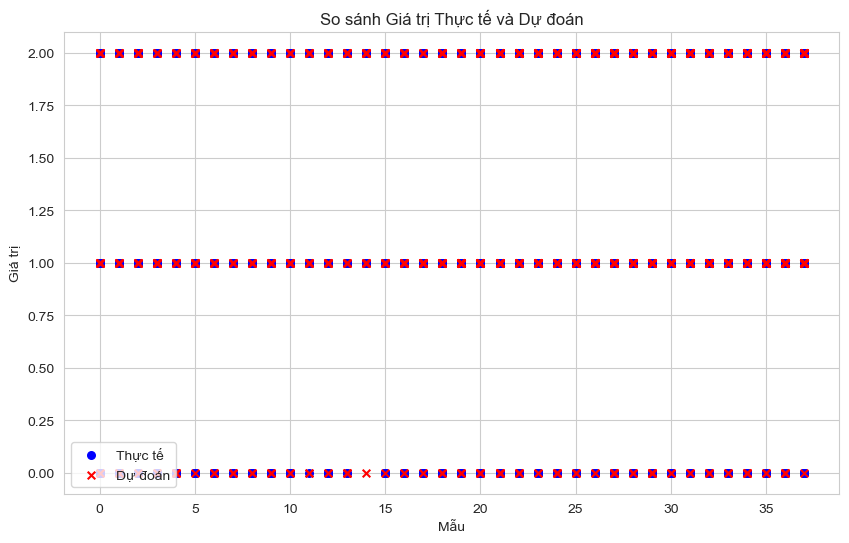

In [76]:
plt.scatter(combined.index, combined['actual'], label='Thực tế', marker='o', s=30, color='blue')
plt.scatter(combined.index, combined['predicted'], label='Dự đoán', marker='x', s=30, color='red')
plt.xlabel('Mẫu')
plt.ylabel('Giá trị')
plt.legend()
plt.title('So sánh Giá trị Thực tế và Dự đoán')
plt.show()